In [83]:
#Requisite Scikit-Learn packages
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#Scipy packages
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import pearsonr

#Visualisation and Computation packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [84]:
grain_samples = np.array([[ 15.26,14.84,0.871 ,5.763 ,3.312 ,2.221 ,5.22  ],[ 14.88,14.57,0.8811,5.554 ,3.333 ,1.018 ,4.956 ],[ 14.29,14.09,0.905 ,5.291 ,3.337 ,2.699 ,4.825 ],[ 13.84,13.94,0.8955,5.324 ,3.379 ,2.259 ,4.805 ],[ 16.14,14.99,0.9034,5.658 ,3.562 ,1.355 ,5.175 ],[ 14.38,14.21,0.8951,5.386 ,3.312 ,2.462 ,4.956 ],[ 14.69,14.49,0.8799,5.563 ,3.259 ,3.586 ,5.219 ],[ 14.11,14.1 ,0.8911,5.42,3.302 ,2.7 ,5.    ],[ 16.63,15.46,0.8747,6.053 ,3.465 ,2.04,5.877 ],[ 16.44,15.25,0.888 ,5.884 ,3.505 ,1.969 ,5.533 ],[ 15.26,14.85,0.8696,5.714 ,3.242 ,4.543 ,5.314 ],[ 14.03,14.16,0.8796,5.438 ,3.201 ,1.717 ,5.001 ],[ 13.89,14.02,0.888 ,5.439 ,3.199 ,3.986 ,4.738 ],[ 13.78,14.06,0.8759,5.479 ,3.156 ,3.136 ,4.872 ],[ 13.74,14.05,0.8744,5.482 ,3.114 ,2.932 ,4.825 ],[ 14.59,14.28,0.8993,5.351 ,3.333 ,4.185 ,4.781 ],[ 13.99,13.83,0.9183,5.119 ,3.383 ,5.234 ,4.781 ],[ 15.69,14.75,0.9058,5.527 ,3.514 ,1.599 ,5.046 ],[ 14.7 ,14.21,0.9153,5.205 ,3.466 ,1.767 ,4.649 ],[ 12.72,13.57,0.8686,5.226 ,3.049 ,4.102 ,4.914 ],[ 14.16,14.4 ,0.8584,5.658 ,3.129 ,3.072 ,5.176 ],[ 14.11,14.26,0.8722,5.52,3.168 ,2.688 ,5.219 ],[ 15.88,14.9 ,0.8988,5.618 ,3.507 ,0.7651,5.091 ],[ 12.08,13.23,0.8664,5.099 ,2.936 ,1.415 ,4.961 ],[ 15.01,14.76,0.8657,5.789 ,3.245 ,1.791 ,5.001 ],[ 16.19,15.16,0.8849,5.833 ,3.421 ,0.903 ,5.307 ],[ 13.02,13.76,0.8641,5.395 ,3.026 ,3.373 ,4.825 ],[ 12.74,13.67,0.8564,5.395 ,2.956 ,2.504 ,4.869 ],[ 14.11,14.18,0.882 ,5.541 ,3.221 ,2.754 ,5.038 ],[ 13.45,14.02,0.8604,5.516 ,3.065 ,3.531 ,5.097 ],[ 13.16,13.82,0.8662,5.454 ,2.975 ,0.8551,5.056 ],[ 15.49,14.94,0.8724,5.757 ,3.371 ,3.412 ,5.228 ],[ 14.09,14.41,0.8529,5.717 ,3.186 ,3.92,5.299 ],[ 13.94,14.17,0.8728,5.585 ,3.15,2.124 ,5.012 ],[ 15.05,14.68,0.8779,5.712 ,3.328 ,2.129 ,5.36  ],[ 16.12,15.  ,0.9 ,5.709 ,3.485 ,2.27,5.443 ],[ 16.2 ,15.27,0.8734,5.826 ,3.464 ,2.823 ,5.527 ],[ 17.08,15.38,0.9079,5.832 ,3.683 ,2.956 ,5.484 ],[ 14.8 ,14.52,0.8823,5.656 ,3.288 ,3.112 ,5.309 ],[ 14.28,14.17,0.8944,5.397 ,3.298 ,6.685 ,5.001 ],[ 13.54,13.85,0.8871,5.348 ,3.156 ,2.587 ,5.178 ],[ 13.5 ,13.85,0.8852,5.351 ,3.158 ,2.249 ,5.176 ],[ 13.16,13.55,0.9009,5.138 ,3.201 ,2.461 ,4.783 ],[ 15.5 ,14.86,0.882 ,5.877 ,3.396 ,4.711 ,5.528 ],[ 15.11,14.54,0.8986,5.579 ,3.462 ,3.128 ,5.18  ],[ 13.8 ,14.04,0.8794,5.376 ,3.155 ,1.56,4.961 ],[ 15.36,14.76,0.8861,5.701 ,3.393 ,1.367 ,5.132 ],[ 14.99,14.56,0.8883,5.57,3.377 ,2.958 ,5.175 ],[ 14.79,14.52,0.8819,5.545 ,3.291 ,2.704 ,5.111 ],[ 14.86,14.67,0.8676,5.678 ,3.258 ,2.129 ,5.351 ],[ 14.43,14.4 ,0.8751,5.585 ,3.272 ,3.975 ,5.144 ],[ 15.78,14.91,0.8923,5.674 ,3.434 ,5.593 ,5.136 ],[ 14.49,14.61,0.8538,5.715 ,3.113 ,4.116 ,5.396 ],[ 14.33,14.28,0.8831,5.504 ,3.199 ,3.328 ,5.224 ],[ 14.52,14.6 ,0.8557,5.741 ,3.113 ,1.481 ,5.487 ],[ 15.03,14.77,0.8658,5.702 ,3.212 ,1.933 ,5.439 ],[ 14.46,14.35,0.8818,5.388 ,3.377 ,2.802 ,5.044 ],[ 14.92,14.43,0.9006,5.384 ,3.412 ,1.142 ,5.088 ],[ 15.38,14.77,0.8857,5.662 ,3.419 ,1.999 ,5.222 ],[ 12.11,13.47,0.8392,5.159 ,3.032 ,1.502 ,4.519 ],[ 11.42,12.86,0.8683,5.008 ,2.85,2.7 ,4.607 ],[ 11.23,12.63,0.884 ,4.902 ,2.879 ,2.269 ,4.703 ],[ 12.36,13.19,0.8923,5.076 ,3.042 ,3.22,4.605 ],[ 13.22,13.84,0.868 ,5.395 ,3.07,4.157 ,5.088 ],[ 12.78,13.57,0.8716,5.262 ,3.026 ,1.176 ,4.782 ],[ 12.88,13.5 ,0.8879,5.139 ,3.119 ,2.352 ,4.607 ],[ 14.34,14.37,0.8726,5.63,3.19,1.313 ,5.15  ],[ 14.01,14.29,0.8625,5.609 ,3.158 ,2.217 ,5.132 ],[ 14.37,14.39,0.8726,5.569 ,3.153 ,1.464 ,5.3   ],[ 12.73,13.75,0.8458,5.412 ,2.882 ,3.533 ,5.067 ],[ 17.63,15.98,0.8673,6.191 ,3.561 ,4.076 ,6.06  ],[ 16.84,15.67,0.8623,5.998 ,3.484 ,4.675 ,5.877 ],[ 17.26,15.73,0.8763,5.978 ,3.594 ,4.539 ,5.791 ],[ 19.11,16.26,0.9081,6.154 ,3.93,2.936 ,6.079 ],[ 16.82,15.51,0.8786,6.017 ,3.486 ,4.004 ,5.841 ],[ 16.77,15.62,0.8638,5.927 ,3.438 ,4.92,5.795 ],[ 17.32,15.91,0.8599,6.064 ,3.403 ,3.824 ,5.922 ],[ 20.71,17.23,0.8763,6.579 ,3.814 ,4.451 ,6.451 ],[ 18.94,16.49,0.875 ,6.445 ,3.639 ,5.064 ,6.362 ],[ 17.12,15.55,0.8892,5.85,3.566 ,2.858 ,5.746 ],[ 16.53,15.34,0.8823,5.875 ,3.467 ,5.532 ,5.88  ],[ 18.72,16.19,0.8977,6.006 ,3.857 ,5.324 ,5.879 ],[ 20.2 ,16.89,0.8894,6.285 ,3.864 ,5.173 ,6.187 ],[ 19.57,16.74,0.8779,6.384 ,3.772 ,1.472 ,6.273 ],[ 19.51,16.71,0.878 ,6.366 ,3.801 ,2.962 ,6.185 ],[ 18.27,16.09,0.887 ,6.173 ,3.651 ,2.443 ,6.197 ],[ 18.88,16.26,0.8969,6.084 ,3.764 ,1.649 ,6.109 ],[ 18.98,16.66,0.859 ,6.549 ,3.67,3.691 ,6.498 ],[ 21.18,17.21,0.8989,6.573 ,4.033 ,5.78,6.231 ],[ 20.88,17.05,0.9031,6.45,4.032 ,5.016 ,6.321 ],[ 20.1 ,16.99,0.8746,6.581 ,3.785 ,1.955 ,6.449 ],[ 18.76,16.2 ,0.8984,6.172 ,3.796 ,3.12,6.053 ],[ 18.81,16.29,0.8906,6.272 ,3.693 ,3.237 ,6.053 ],[ 18.59,16.05,0.9066,6.037 ,3.86,6.001 ,5.877 ],[ 18.36,16.52,0.8452,6.666 ,3.485 ,4.933 ,6.448 ],[ 16.87,15.65,0.8648,6.139 ,3.463 ,3.696 ,5.967 ],[ 19.31,16.59,0.8815,6.341 ,3.81,3.477 ,6.238 ],[ 18.98,16.57,0.8687,6.449 ,3.552 ,2.144 ,6.453 ],[ 18.17,16.26,0.8637,6.271 ,3.512 ,2.853 ,6.273 ],[ 18.72,16.34,0.881 ,6.219 ,3.684 ,2.188 ,6.097 ],[ 16.41,15.25,0.8866,5.718 ,3.525 ,4.217 ,5.618 ],[ 17.99,15.86,0.8992,5.89,3.694 ,2.068 ,5.837 ],[ 19.46,16.5 ,0.8985,6.113 ,3.892 ,4.308 ,6.009 ],[ 19.18,16.63,0.8717,6.369 ,3.681 ,3.357 ,6.229 ],[ 18.95,16.42,0.8829,6.248 ,3.755 ,3.368 ,6.148 ],[ 18.83,16.29,0.8917,6.037 ,3.786 ,2.553 ,5.879 ],[ 18.85,16.17,0.9056,6.152 ,3.806 ,2.843 ,6.2   ],[ 17.63,15.86,0.88,6.033 ,3.573 ,3.747 ,5.929 ],[ 19.94,16.92,0.8752,6.675 ,3.763 ,3.252 ,6.55  ],[ 18.55,16.22,0.8865,6.153 ,3.674 ,1.738 ,5.894 ],[ 18.45,16.12,0.8921,6.107 ,3.769 ,2.235 ,5.794 ],[ 19.38,16.72,0.8716,6.303 ,3.791 ,3.678 ,5.965 ],[ 19.13,16.31,0.9035,6.183 ,3.902 ,2.109 ,5.924 ],[ 19.14,16.61,0.8722,6.259 ,3.737 ,6.682 ,6.053 ],[ 20.97,17.25,0.8859,6.563 ,3.991 ,4.677 ,6.316 ],[ 19.06,16.45,0.8854,6.416 ,3.719 ,2.248 ,6.163 ],[ 18.96,16.2 ,0.9077,6.051 ,3.897 ,4.334 ,5.75  ],[ 19.15,16.45,0.889 ,6.245 ,3.815 ,3.084 ,6.185 ],[ 18.89,16.23,0.9008,6.227 ,3.769 ,3.639 ,5.966 ],[ 20.03,16.9 ,0.8811,6.493 ,3.857 ,3.063 ,6.32  ],[ 20.24,16.91,0.8897,6.315 ,3.962 ,5.901 ,6.188 ],[ 18.14,16.12,0.8772,6.059 ,3.563 ,3.619 ,6.011 ],[ 16.17,15.38,0.8588,5.762 ,3.387 ,4.286 ,5.703 ],[ 18.43,15.97,0.9077,5.98,3.771 ,2.984 ,5.905 ],[ 15.99,14.89,0.9064,5.363 ,3.582 ,3.336 ,5.144 ],[ 18.75,16.18,0.8999,6.111 ,3.869 ,4.188 ,5.992 ],[ 18.65,16.41,0.8698,6.285 ,3.594 ,4.391 ,6.102 ],[ 17.98,15.85,0.8993,5.979 ,3.687 ,2.257 ,5.919 ],[ 20.16,17.03,0.8735,6.513 ,3.773 ,1.91,6.185 ],[ 17.55,15.66,0.8991,5.791 ,3.69,5.366 ,5.661 ],[ 18.3 ,15.89,0.9108,5.979 ,3.755 ,2.837 ,5.962 ],[ 18.94,16.32,0.8942,6.144 ,3.825 ,2.908 ,5.949 ],[ 15.38,14.9 ,0.8706,5.884 ,3.268 ,4.462 ,5.795 ],[ 16.16,15.33,0.8644,5.845 ,3.395 ,4.266 ,5.795 ],[ 15.56,14.89,0.8823,5.776 ,3.408 ,4.972 ,5.847 ],[ 15.38,14.66,0.899 ,5.477 ,3.465 ,3.6 ,5.439 ],[ 17.36,15.76,0.8785,6.145 ,3.574 ,3.526 ,5.971 ],[ 15.57,15.15,0.8527,5.92,3.231 ,2.64,5.879 ],[ 15.6 ,15.11,0.858 ,5.832 ,3.286 ,2.725 ,5.752 ],[ 16.23,15.18,0.885 ,5.872 ,3.472 ,3.769 ,5.922 ],[ 13.07,13.92,0.848 ,5.472 ,2.994 ,5.304 ,5.395 ],[ 13.32,13.94,0.8613,5.541 ,3.073 ,7.035 ,5.44  ],[ 13.34,13.95,0.862 ,5.389 ,3.074 ,5.995 ,5.307 ],[ 12.22,13.32,0.8652,5.224 ,2.967 ,5.469 ,5.221 ],[ 11.82,13.4 ,0.8274,5.314 ,2.777 ,4.471 ,5.178 ],[ 11.21,13.13,0.8167,5.279 ,2.687 ,6.169 ,5.275 ],[ 11.43,13.13,0.8335,5.176 ,2.719 ,2.221 ,5.132 ],[ 12.49,13.46,0.8658,5.267 ,2.967 ,4.421 ,5.002 ],[ 12.7 ,13.71,0.8491,5.386 ,2.911 ,3.26,5.316 ],[ 10.79,12.93,0.8107,5.317 ,2.648 ,5.462 ,5.194 ],[ 11.83,13.23,0.8496,5.263 ,2.84,5.195 ,5.307 ],[ 12.01,13.52,0.8249,5.405 ,2.776 ,6.992 ,5.27  ],[ 12.26,13.6 ,0.8333,5.408 ,2.833 ,4.756 ,5.36  ],[ 11.18,13.04,0.8266,5.22,2.693 ,3.332 ,5.001 ],[ 11.36,13.05,0.8382,5.175 ,2.755 ,4.048 ,5.263 ],[ 11.19,13.05,0.8253,5.25,2.675 ,5.813 ,5.219 ],[ 11.34,12.87,0.8596,5.053 ,2.849 ,3.347 ,5.003 ],[ 12.13,13.73,0.8081,5.394 ,2.745 ,4.825 ,5.22  ],[ 11.75,13.52,0.8082,5.444 ,2.678 ,4.378 ,5.31  ],[ 11.49,13.22,0.8263,5.304 ,2.695 ,5.388 ,5.31  ],[ 12.54,13.67,0.8425,5.451 ,2.879 ,3.082 ,5.491 ],[ 12.02,13.33,0.8503,5.35,2.81,4.271 ,5.308 ],[ 12.05,13.41,0.8416,5.267 ,2.847 ,4.988 ,5.046 ],[ 12.55,13.57,0.8558,5.333 ,2.968 ,4.419 ,5.176 ],[ 11.14,12.79,0.8558,5.011 ,2.794 ,6.388 ,5.049 ],[ 12.1 ,13.15,0.8793,5.105 ,2.941 ,2.201 ,5.056 ],[ 12.44,13.59,0.8462,5.319 ,2.897 ,4.924 ,5.27  ],[ 12.15,13.45,0.8443,5.417 ,2.837 ,3.638 ,5.338 ],[ 11.35,13.12,0.8291,5.176 ,2.668 ,4.337 ,5.132 ],[ 11.24,13.  ,0.8359,5.09,2.715 ,3.521 ,5.088 ],[ 11.02,13.  ,0.8189,5.325 ,2.701 ,6.735 ,5.163 ],[ 11.55,13.1 ,0.8455,5.167 ,2.845 ,6.715 ,4.956 ],[ 11.27,12.97,0.8419,5.088 ,2.763 ,4.309 ,5.    ],[ 11.4 ,13.08,0.8375,5.136 ,2.763 ,5.588 ,5.089 ],[ 10.83,12.96,0.8099,5.278 ,2.641 ,5.182 ,5.185 ],[ 10.8 ,12.57,0.859 ,4.981 ,2.821 ,4.773 ,5.063 ],[ 11.26,13.01,0.8355,5.186 ,2.71,5.335 ,5.092 ],[ 10.74,12.73,0.8329,5.145 ,2.642 ,4.702 ,4.963 ],[ 11.48,13.05,0.8473,5.18,2.758 ,5.876 ,5.002 ],[ 12.21,13.47,0.8453,5.357 ,2.893 ,1.661 ,5.178 ],[ 11.41,12.95,0.856 ,5.09,2.775 ,4.957 ,4.825 ],[ 12.46,13.41,0.8706,5.236 ,3.017 ,4.987 ,5.147 ],[ 12.19,13.36,0.8579,5.24,2.909 ,4.857 ,5.158 ],[ 11.65,13.07,0.8575,5.108 ,2.85,5.209 ,5.135 ],[ 12.89,13.77,0.8541,5.495 ,3.026 ,6.185 ,5.316 ],[ 11.56,13.31,0.8198,5.363 ,2.683 ,4.062 ,5.182 ],[ 11.81,13.45,0.8198,5.413 ,2.716 ,4.898 ,5.352 ],[ 10.91,12.8 ,0.8372,5.088 ,2.675 ,4.179 ,4.956 ],[ 11.23,12.82,0.8594,5.089 ,2.821 ,7.524 ,4.957 ],[ 10.59,12.41,0.8648,4.899 ,2.787 ,4.975 ,4.794 ],[ 10.93,12.8 ,0.839 ,5.046 ,2.717 ,5.398 ,5.045 ],[ 11.27,12.86,0.8563,5.091 ,2.804 ,3.985 ,5.001 ],[ 11.87,13.02,0.8795,5.132 ,2.953 ,3.597 ,5.132 ],[ 10.82,12.83,0.8256,5.18,2.63,4.853 ,5.089 ],[ 12.11,13.27,0.8639,5.236 ,2.975 ,4.132 ,5.012 ],[ 12.8 ,13.47,0.886 ,5.16,3.126 ,4.873 ,4.914 ],[ 12.79,13.53,0.8786,5.224 ,3.054 ,5.483 ,4.958 ],[ 13.37,13.78,0.8849,5.32,3.128 ,4.67,5.091 ],[ 12.62,13.67,0.8481,5.41,2.911 ,3.306 ,5.231 ],[ 12.76,13.38,0.8964,5.073 ,3.155 ,2.828 ,4.83  ],[ 12.38,13.44,0.8609,5.219 ,2.989 ,5.472 ,5.045 ],[ 12.67,13.32,0.8977,4.984 ,3.135 ,2.3 ,4.745 ],[ 11.18,12.72,0.868 ,5.009 ,2.81,4.051 ,4.828 ],[ 12.7 ,13.41,0.8874,5.183 ,3.091 ,8.456 ,5.    ],[ 12.37,13.47,0.8567,5.204 ,2.96,3.919 ,5.001 ],[ 12.19,13.2 ,0.8783,5.137 ,2.981 ,3.631 ,4.87  ],[ 11.23,12.88,0.8511,5.14,2.795 ,4.325 ,5.003 ],[ 13.2 ,13.66,0.8883,5.236 ,3.232 ,8.315 ,5.056 ],[ 11.84,13.21,0.8521,5.175 ,2.836 ,3.598 ,5.044 ],[ 12.3 ,13.34,0.8684,5.243 ,2.974 ,5.637 ,5.063 ]])
variety_numbers = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
varieties = ['Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat']

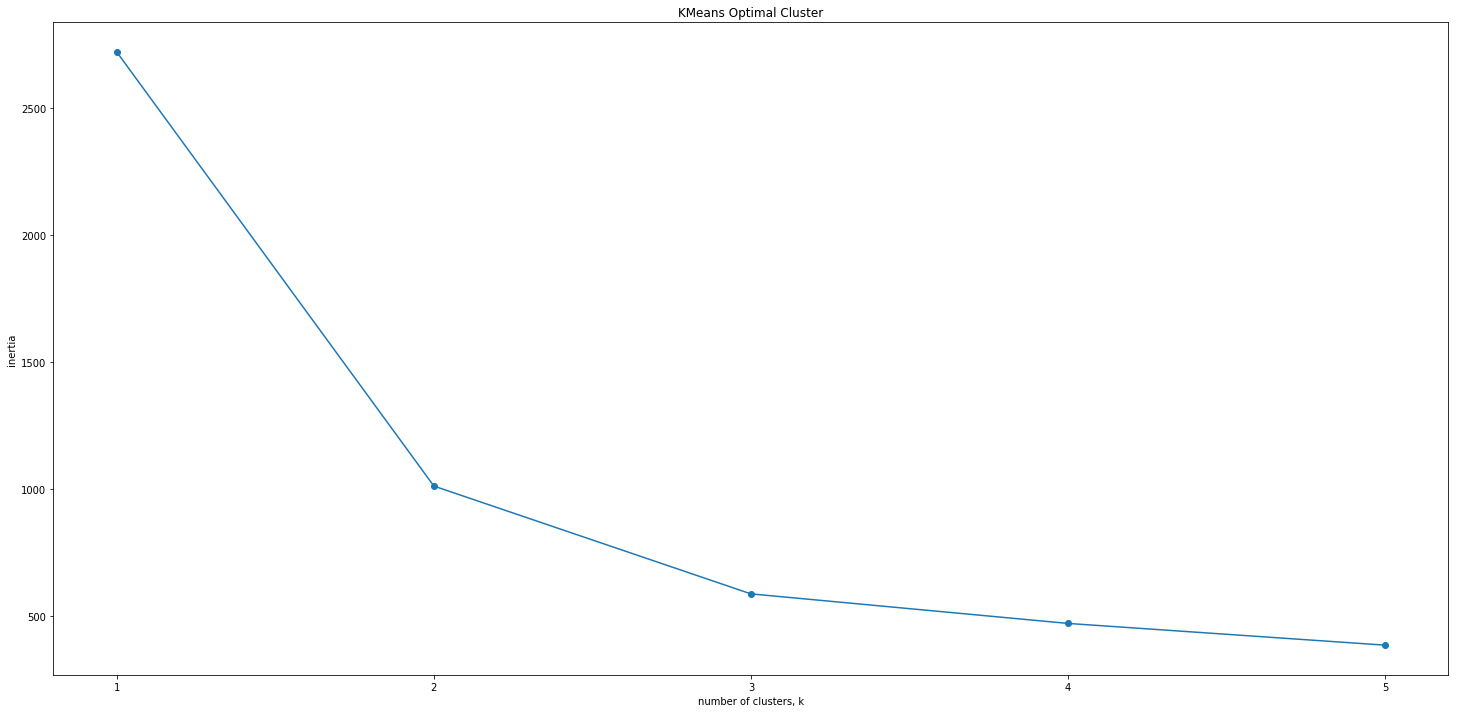

In [85]:
# Evaluating decent cluster option for KMeans
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(grain_samples)
    inertias.append(model.inertia_)
    
# Plot of ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('KMeans Optimal Cluster')
plt.xticks(ks)
plt.show()


In [86]:
#Comparing present clusters to the grain varieties using cross-tabulation
model = KMeans(n_clusters = 3)
labels = model.fit_predict(grain_samples)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Creating crosstab using labels and varieties from the dataframe
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          60          10
1                       0           1          60
2                      68           9           0


# Hierarchical clustering of the grain data

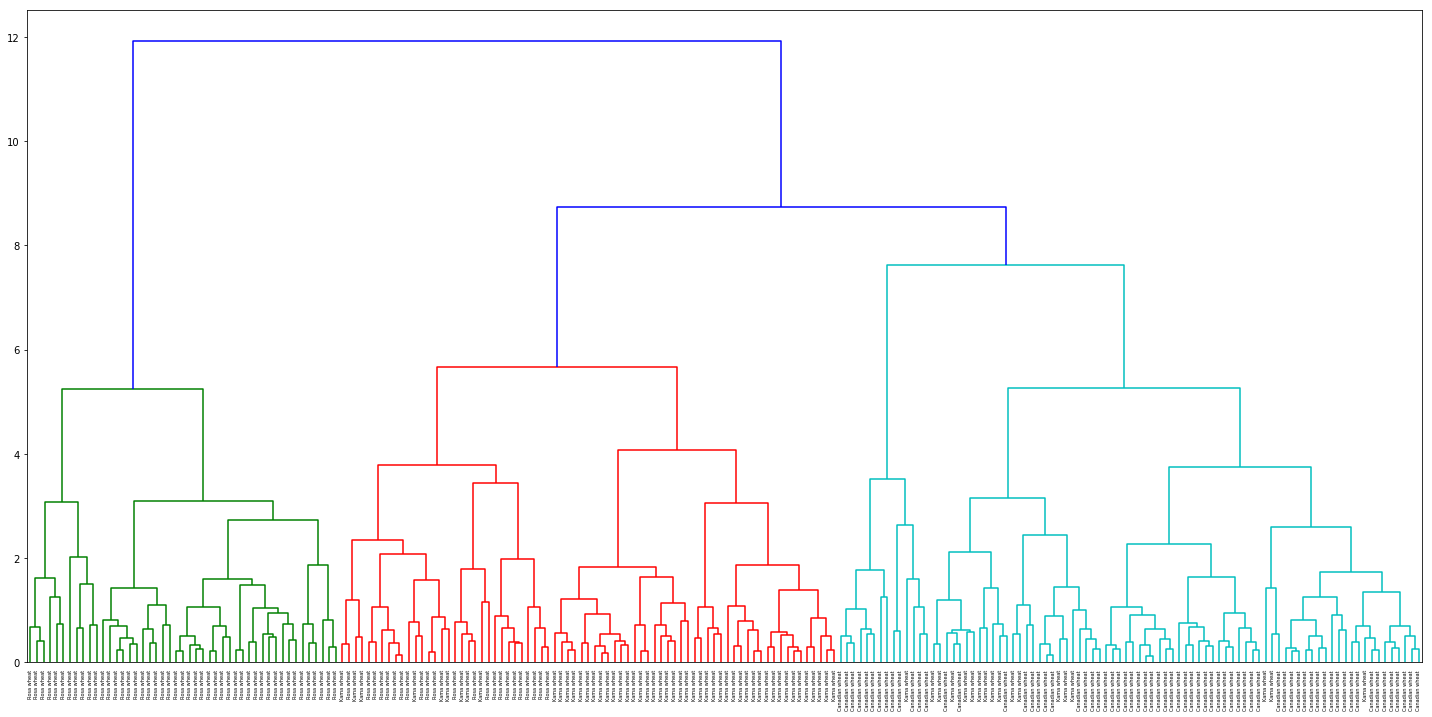

In [87]:
# Calculating the linkage
mergings = linkage(grain_samples, method='complete')

# Plotting the dendrogram using varieties as labels
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=5)
plt.rcParams["figure.figsize"] = (25,12)
plt.show()

# Extracting cluster labels for intermediate clustering

In [88]:
labels = fcluster(mergings, 6, criterion='distance')

# DataFrame with labels and varieties as columns
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Creating a crosstab to count the number of times each grain variety coincides with each cluster label
ct = pd.crosstab(df['labels'], df['varieties'])

# Printing ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


# T-SNE Visualization of dataset

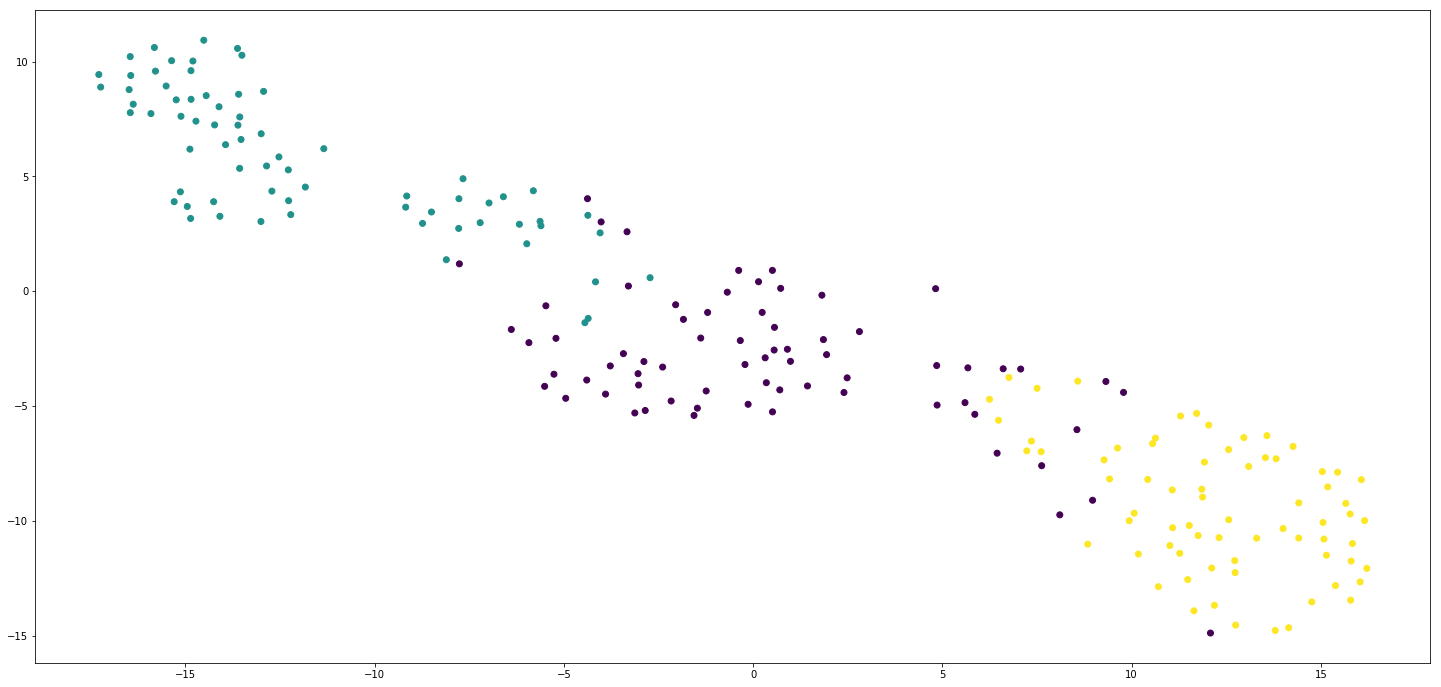

In [89]:

model = TSNE(learning_rate = 200) #Instantiating a TSNE with learning rate of 200
tsne_features = model.fit_transform(grain_samples)

xs = tsne_features[:,0] #0th feature
ys = tsne_features[:,1] #1st feature

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c= variety_numbers)
plt.show()

# Correlation between width and length of the grain samples data

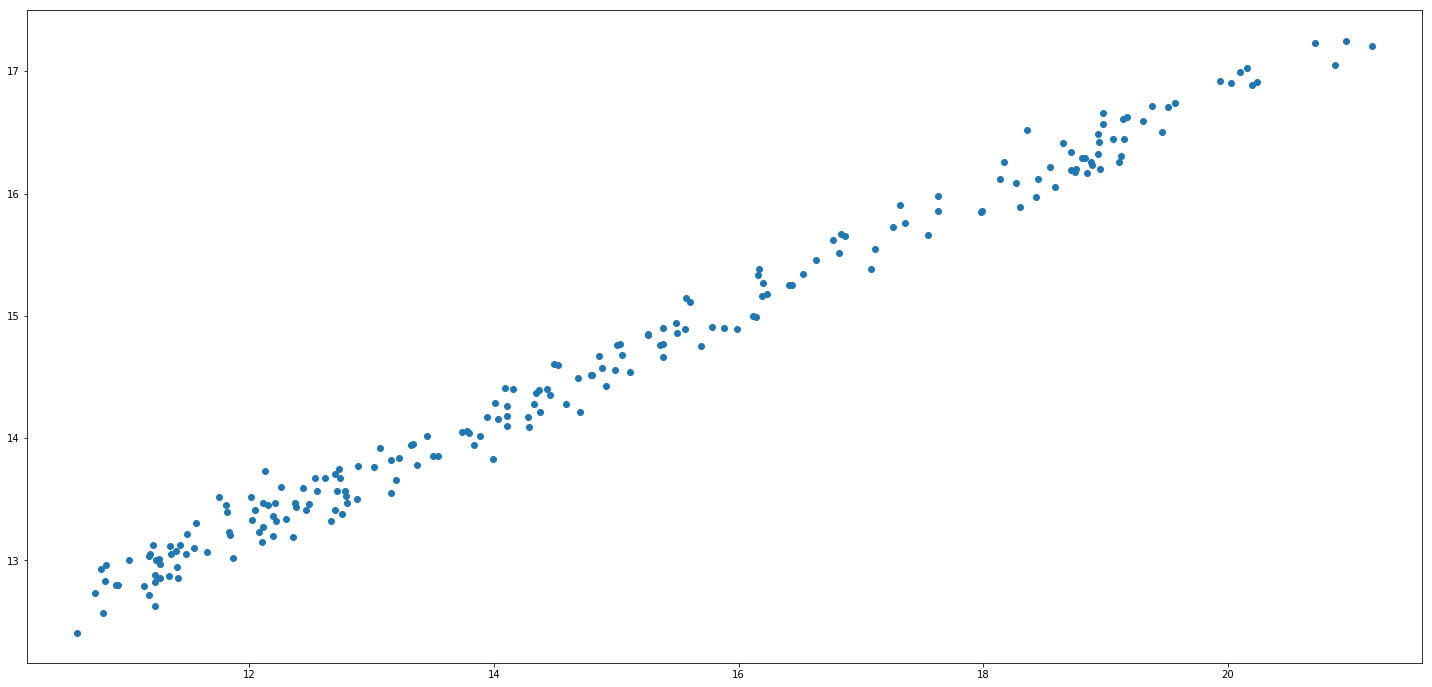

Computed correlation value = 0.994340931012


In [90]:
# Assign the 0th column of grains: width
width = grain_samples[:, 0] #width of grain samples

# Assign the 1st column of grains: length
length = grain_samples[:, 1] #length of grain samples

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculating the Pearson correlation
correlation, pvalue = pearsonr(width, length)
print("Computed correlation value = %s" % correlation)

# Using PCA to decorrelate the grain measurements

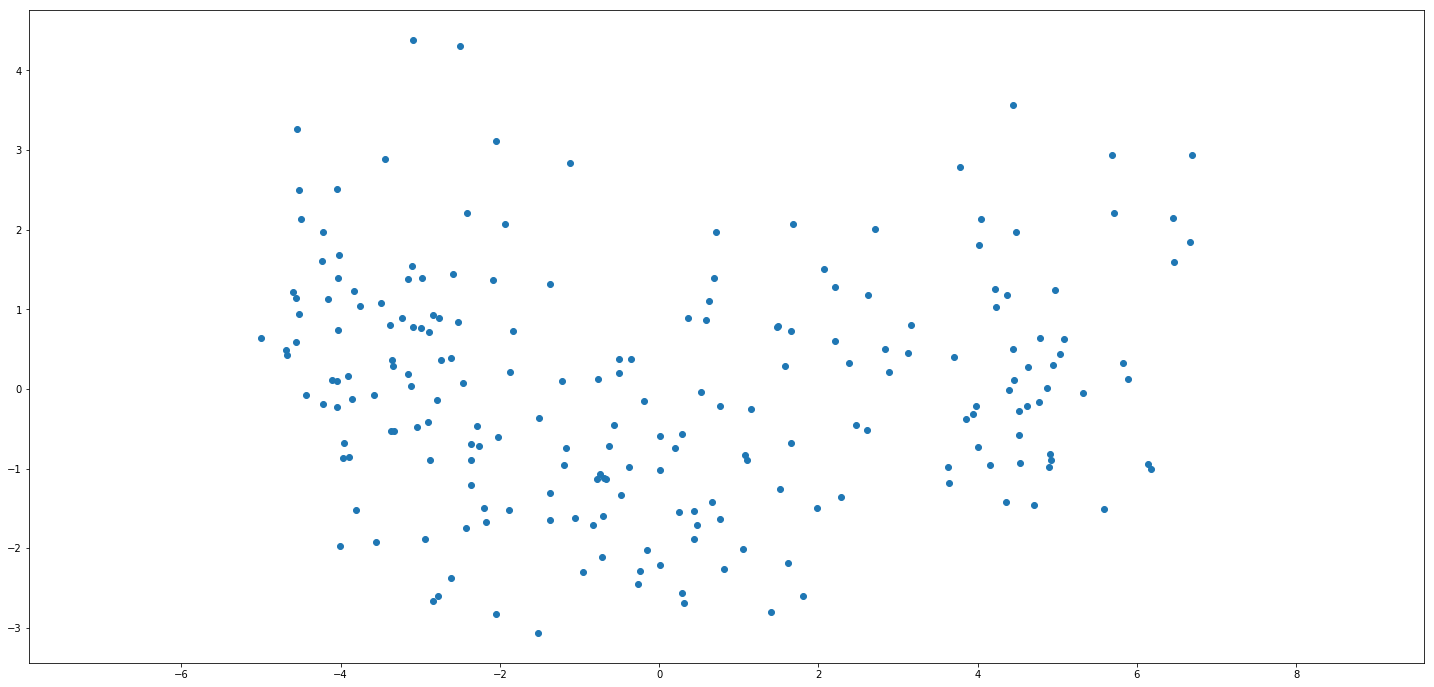

Computed correlation = -4.25484023037e-17


In [91]:
model = PCA() #PCA Instance

pca_features = model.fit_transform(grain_samples)

xs = pca_features[:,0] 
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculating the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)
print("Computed correlation = %s" % correlation)

# Using PCA to compute the first principal component from the grain measurement dataset

Computed mean of the grain sample = 
 [ 14.84752381  14.55928571   0.87099857   5.62853333   3.25860476
   3.70020095   5.40807143]


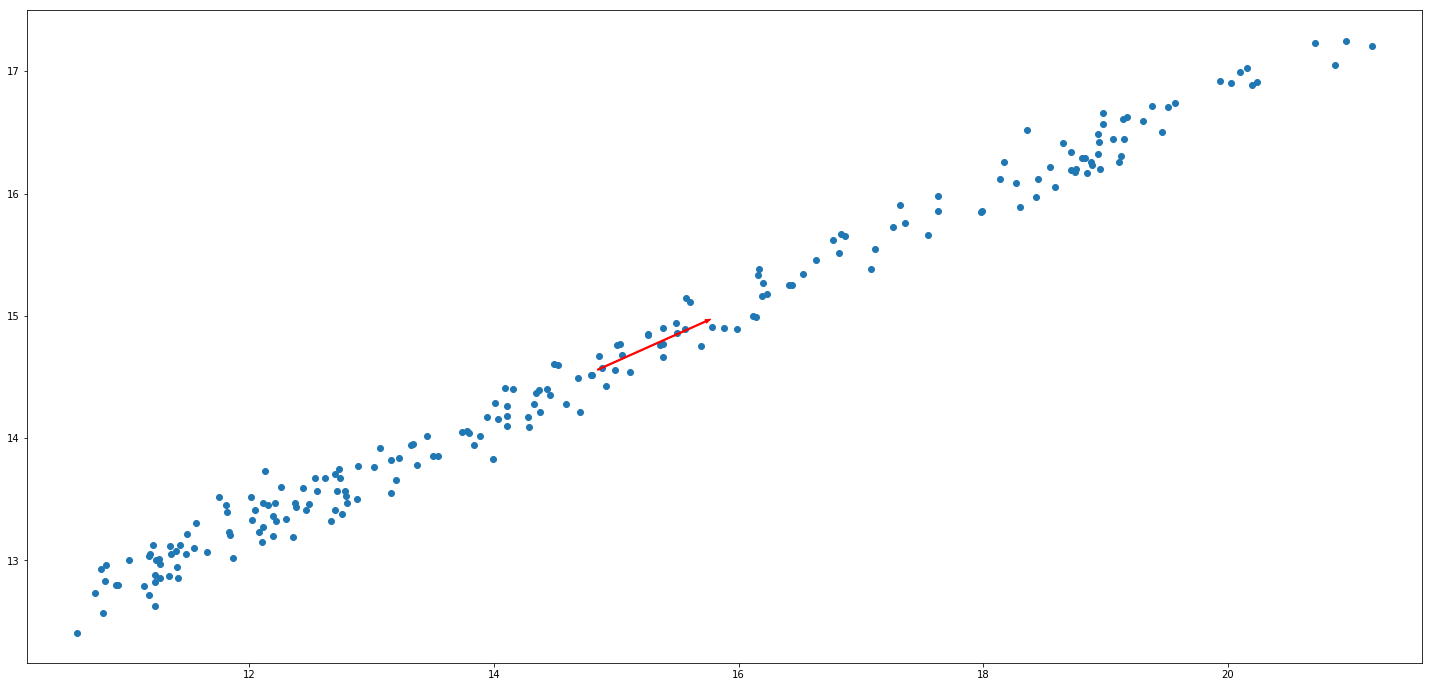

In [92]:
# Scatter plot of the untransformed points
plt.scatter(grain_samples[:,0], grain_samples[:,1])

model = PCA() 
model.fit(grain_samples)

# Get the mean of the grain samples: mean
mean = model.mean_
print ("Computed mean of the grain sample = \n {}".format(mean))

first_pc = model.components_[0,:] #Extracting the first principal component

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

plt.axis('equal') #Keeping axes on the same scale
plt.show()